# Graded Challenge 4

## I. Perkenalan

### I.I Identitas

Nama : Ahmad Nawwaaf

Batch : 002

### I.II Dataset

Dataset yang digunakan adalah informasi pengguna kartu kredit selama 6 bulan terakhir dari suatu bank. Data ini diambil dari BigQuerry Project ID `ftds-hacktiv8-project` dengan  dataset name adalah `phase1_ftds_002_hck` dan nama tabel `credit-card-information`. Data yang digunakan adalah data dengan kolom `CUST_ID` bernilai genap.

Berikut ini adalah SQL yang dilakukan pada BigQuerry Google Cloud Platform

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.credit-card-information`
WHERE MOD(CUST_ID,2)=0
```

Dataset ini disimpan dalam bentuk file `.csv` dengan nama `h8dsft_P1G4_ahmad_nawwaaf.csv`.

Berikut ini adalah penjelasan kolom dari dataset yang digunakan :

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

### I.III Objectives

Tujuan dari tugas ini adalah untuk mengevaluasi konsep Clustering sebagai berikut :

- Mampu memperoleh data menggunakan BigQuery
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mengimplementasikan Clustering pada data yang diberikan

### I.IV Problems

Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dengan dataset berupa informasi penggunaan kartu kredit selama 6 bulan terakhir.

## II. Import Libraries

Library python yang digunakan adalah sebagai berikut :

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
from scipy import stats

# For plotting
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FixedLocator, FixedFormatter
import plotly.express as px


# For Clustering Problems
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

# Standarize the Datasets
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer, OutlierTrimmer

# For Dimensionality Reduction
from sklearn.decomposition import PCA

#For Evaluate Model
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')
import time

## III. Data Loading

Setelah data disave, kemudian dataset akan dimuat pada VS Code untuk dilakukan pengolahan data dan Clustering

In [2]:
df = pd.read_csv('h8dsft_P1G4_ahmad_nawwaaf.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


Diatas adalah gambaran dataset dari 5 data teratas, terlihat bahwa terdapat missing values pada kolom `MINIMUM_PAYMENTS`. Kolom `CUST_ID` merupakan ID atau tanda pengenal dari setiap kostumer yang nilainya berbeda untuk setiap kostumer. Maka dari itu `CUST_ID` akan dijadikan indeks dari dataset. 

In [3]:
df.set_index('CUST_ID', inplace=True)

In [4]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


Kolom `CUST_ID` berhasil dijadikan indeks dataframe.

Selanjutnya akan dilakukan pengecekan missing values pada dataset.

In [5]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

persen data missing values terhadap keseluruhan data

In [6]:
(158+1)/len(df)*100

3.553072625698324

Dari hasil diatas, terdapat missing values pada kolom `MINIMUM_PAYMENTS` sebanyak 158 data dan kolom `CREDIT_LIMIT` sebanyak 1 data. Data missing values berjumlah 3,55 % dari total data yang dimana masih dikatakan cukup sedikit sehingga saya memutuskan untuk menghapus data missing values.

In [7]:
df.dropna(inplace=True)

Setelah missing values dihapus, kemudian akan dicek apakah terdapat data duplikat atau tidak

In [8]:
df.duplicated().any()

False

Dari hasil diatas, bisa diketahui bahwa tidak ada data duplikat pada dataset yang digunakan.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4316.0,1600.114511,2107.347942,0.000000,152.877191,916.693628,2112.447004,19043.138560
BALANCE_FREQUENCY,4316.0,0.895236,0.206730,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,4316.0,1025.274057,2241.729131,0.000000,44.662500,379.300000,1149.940000,49039.570000
ONEOFF_PURCHASES,4316.0,600.770438,1690.105736,0.000000,0.000000,35.955000,600.000000,40761.250000
INSTALLMENTS_PURCHASES,4316.0,424.888909,940.627467,0.000000,0.000000,95.845000,498.592500,22500.000000
CASH_ADVANCE,4316.0,986.980658,2159.134558,0.000000,0.000000,0.000000,1110.248526,29282.109150
PURCHASES_FREQUENCY,4316.0,0.495675,0.399564,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4316.0,0.205447,0.299252,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4316.0,0.369805,0.398217,0.000000,0.000000,0.181818,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4316.0,0.136236,0.200511,0.000000,0.000000,0.000000,0.250000,1.166667


Dari hasil statistik di atas, saya mengasumsikan bahwa seluruh data merupakan feature numerik dimana data dapat diurutkan dari nilai terkecil hingga terbesar ataupun sebaliknya.

Menampilkan informasi dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 1902 to 3564
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4316 non-null   float64
 1   BALANCE_FREQUENCY                 4316 non-null   float64
 2   PURCHASES                         4316 non-null   float64
 3   ONEOFF_PURCHASES                  4316 non-null   float64
 4   INSTALLMENTS_PURCHASES            4316 non-null   float64
 5   CASH_ADVANCE                      4316 non-null   float64
 6   PURCHASES_FREQUENCY               4316 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4316 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4316 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4316 non-null   float64
 10  CASH_ADVANCE_TRX                  4316 non-null   int64  
 11  PURCHASES_TRX                     4316 non-null   int64  
 12  CRE

Dari informasi di atas, seluruh data sudah bertipe numerik sehingga tidak diperlukan untuk melakukan encoding data. Dataset yang akan digunakan setelah melakukan pembersihan data memiliki 4316 baris data dan 17 kolom.

## IV. Exploratory Data Analysis (EDA)

### IV.I Tenure

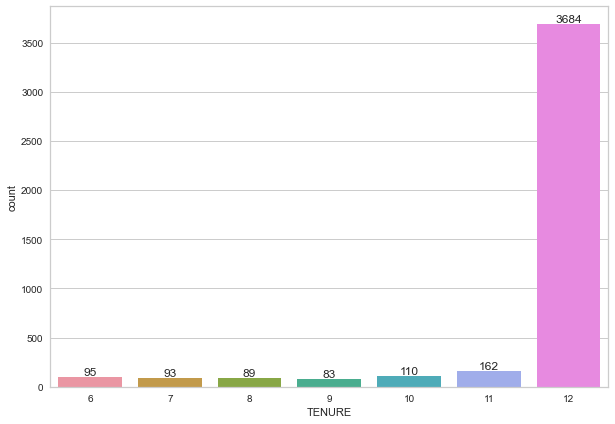

In [11]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data=df, x='TENURE')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=12)
plt.show()

Dari grafik diatas, kita bisa ketahui bahwa kostumer kebanyakan memilih lama waktu cicilan (TENURE) selama 12 bulan. Kemudian selama 11 bulan dan 10 bulan. TENURE paling sedikit yang dipilih kostumer adalah selama 9 bulan. Pemilihan TENURE yang dilakukan oleh kostumer ini tidak seimbang dimana pilihan selama 12 bulan merupakan pilihan utama dari kebanyakan kostumer.

### IV.I Kredit Limit

In [12]:
fig = px.pie(df, names='CREDIT_LIMIT', height=600, width= 600, color_discrete_sequence=px.colors.sequential.RdBu,  title='CREDIT LIMIT')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

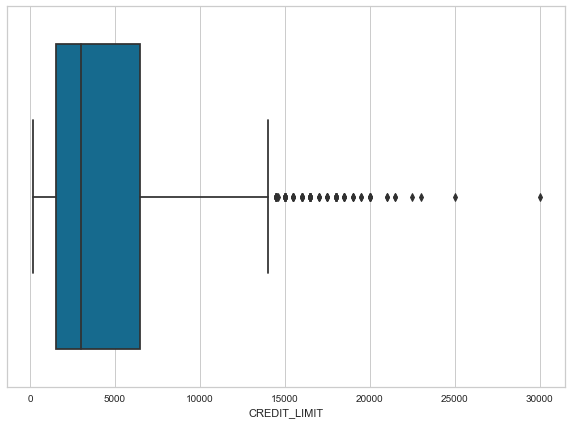

In [60]:
plt.figure(figsize = (10,7))
sns.boxplot(data=df, x='CREDIT_LIMIT')
plt.show()

In [13]:
df.CREDIT_LIMIT.min()

150.0

In [14]:
df.CREDIT_LIMIT.max()

30000.0

Dari grafik diatas, kredit limit memiliki rentang 150 USD hingga 30.000. Kebanyakan pengguna kartu kredit memiliki limit 1500 USD, 3000 USD, dan 1200 USD. Hanya sedikit orang yang memiliki credit limit diatas 14.000.

## V. Data Preprocessing

### V.I Split Data

Setelah dilakukan eksplorasi data, kemudian dataset akan dibagi menjadi data train dan data inference.

#### V.I.I Data Inference

Disini saya mengambil 5 data secara acak untuk dijadikan data inference

In [15]:
data_inf = df.sample(50, random_state=20)

#### V.I.II Data Train

Setelah memilih data inference, sisa datanya menjadi data train yang akan digunakan dalam pemodelan clustering

In [16]:
data_train = df.drop(data_inf.index)

Reset Index

In [17]:
data_inf.reset_index(drop=True, inplace=True)
data_train.reset_index(drop=True, inplace=True)

### V.II EDA for Modelling

#### V.II.I Distribusi data

Disini saya ingin melihat distribusi setiap kolom pada dataset

Membuat list kolom kategori dan kolom numerik

In [18]:
num_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS','BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']

Feature numerik kemudian diplot untuk melihat distribusinya

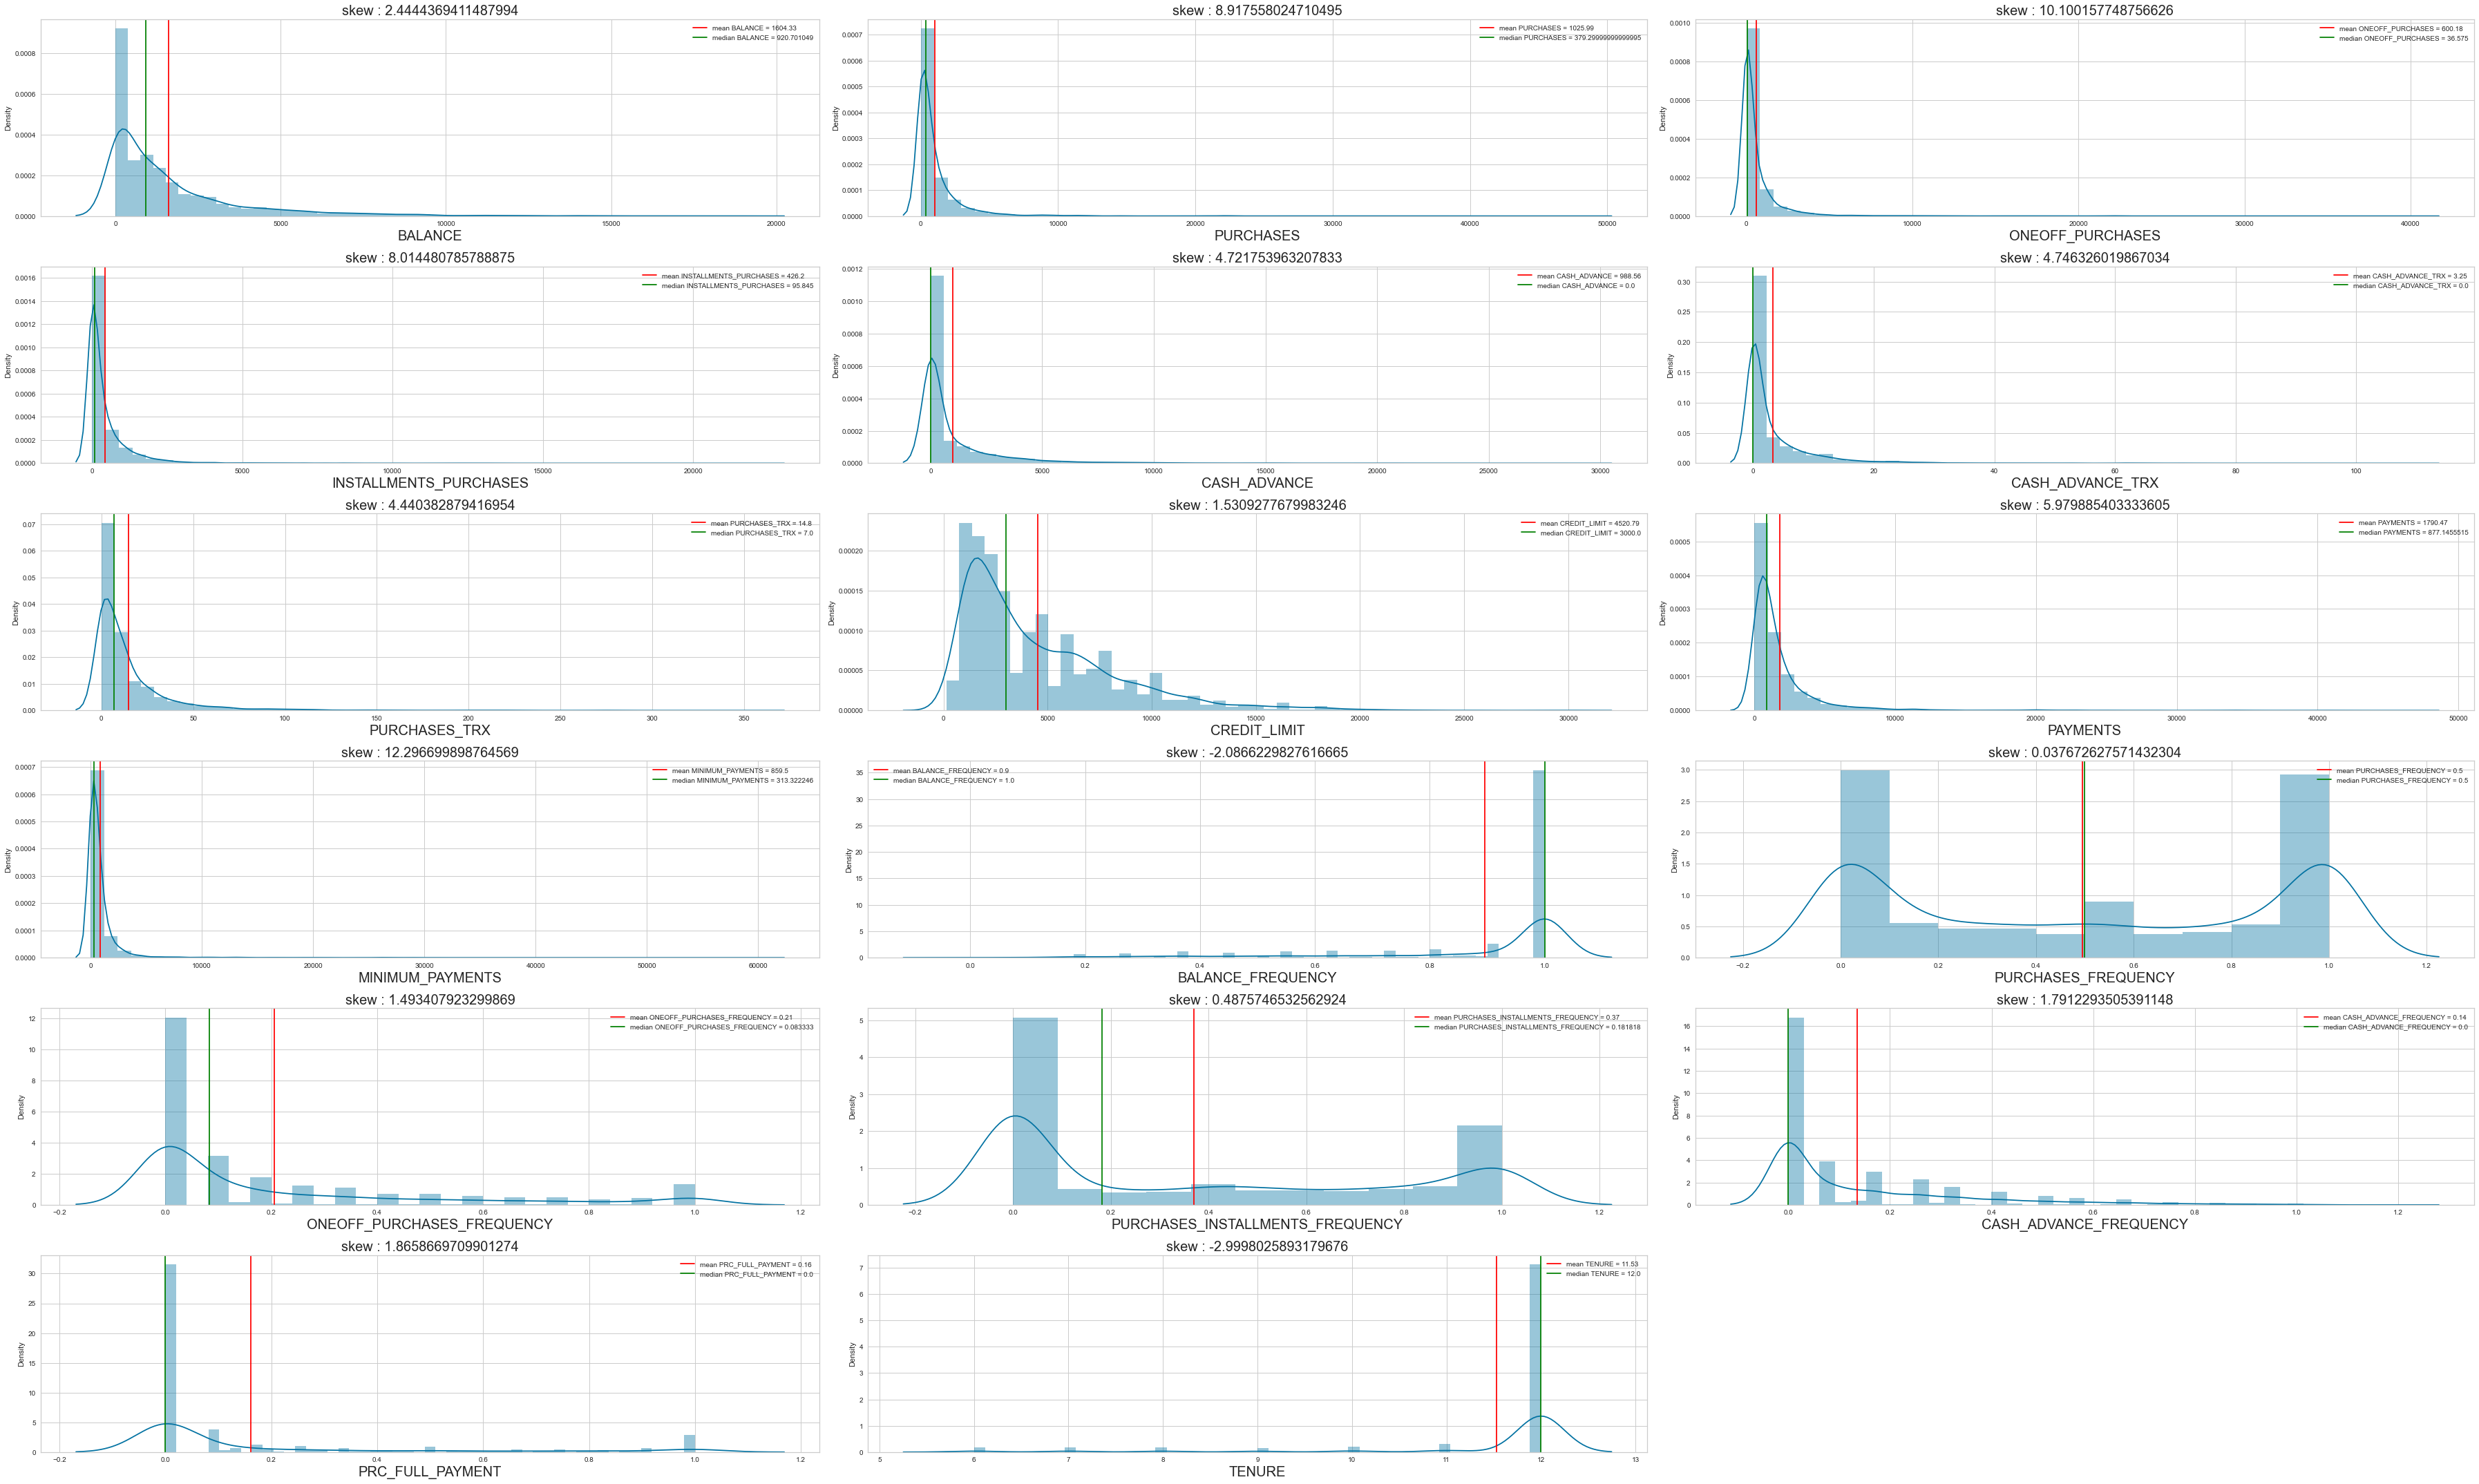

In [19]:
plt.figure(figsize=(50,30))
for idx, col in enumerate(data_train[num_col]):
        plt.subplot(6,3,idx+1)
        sns.distplot(data_train[num_col][col])
        plt.title(f'skew : {data_train[num_col][col].skew()}', fontsize=20)
        plt.axvline(x=data_train[num_col][col].mean(), color='red', label=f'mean {col} = {round(data_train[num_col][col].mean(), 2)}')
        plt.axvline(x=data_train[num_col][col].median(), color='green', label=f'median {col} = {data_train[num_col][col].median()}')
        plt.legend()
        plt.xlabel(f'{col}', fontsize=20)
        plt.tight_layout()

In [20]:
num_col

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'PRC_FULL_PAYMENT',
 'TENURE']

Dari grafik di atas, hampir seluruh persebaran data dari feature numerik adalah skew right dengan nilai skew diatas 1 yang menandakan skew ekstrim. Hanya feature `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` yang datanya tersebar secara normal.

#### V.II.II Data Outliers

Pada bagian ini, data akan diplot menggunakan boxplot untuk melihat apakah terdapat outliers atau tidak

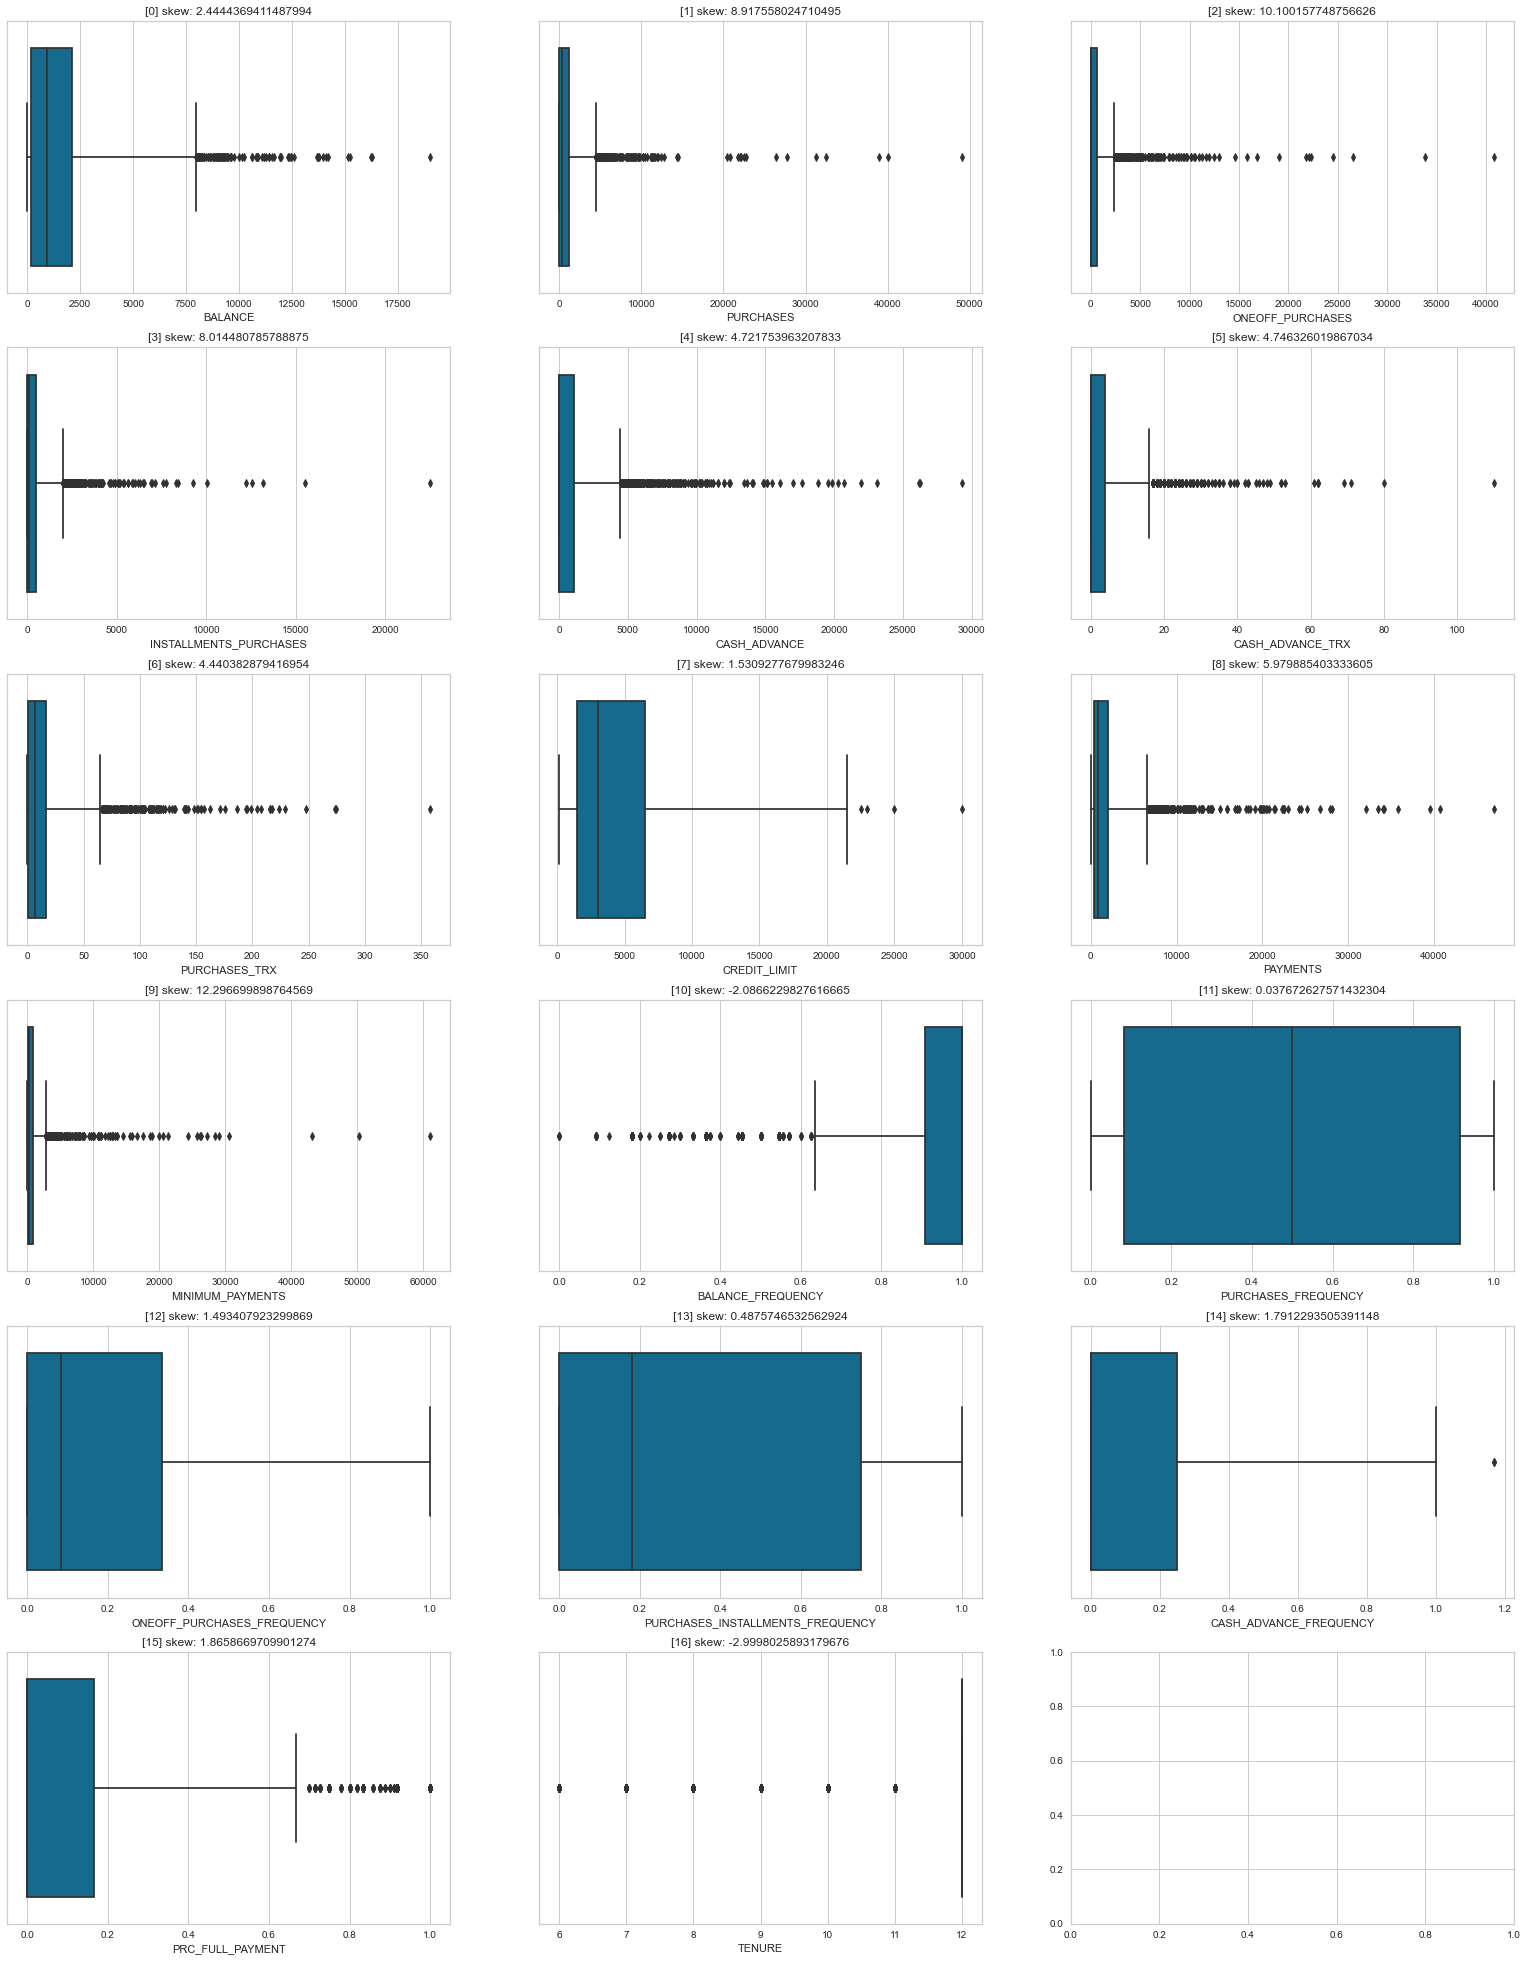

In [21]:
fig, ax = plt.subplots(ncols=3,nrows=6, figsize=[27,35])
ax = ax.flatten()

for idx, col in enumerate(data_train[num_col].columns):
    sns.boxplot(data_train[num_col][col], ax=ax[idx], whis=3)
    ax[idx].set_title(f'{[idx]} skew: {data_train[num_col][col].skew()}')

Dari hasil di atas, hampir seluruh feature numerik memiliki outliers. Berikut ini kode untuk menghitung berapa persen data outliers dari setiap feature numerik.

In [22]:
def outlier_analysis(train,col):
  skewness = train[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = train[col].mean() + 3*train[col].std()
    lower = train[col].mean() - 3*train[col].std()
  elif (skewness>=-1 and skewness<=-0.5) or (skewness>=0.5 and skewness<=1):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
  else:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
  
  # no_outliers = train[(train[col]>=lower) & (train[col]<=upper)]
  outliers = train[(train[col]<lower) | (train[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/train.shape[0] * 100, '%')
  return outliers, upper, lower

for i in list(data_train[num_col].columns):
  outlier_analysis(data_train[num_col],i)

percentage outlier from BALANCE : 2.203469292076887 %
percentage outlier from PURCHASES : 4.008438818565401 %
percentage outlier from ONEOFF_PURCHASES : 5.93061415846226 %
percentage outlier from INSTALLMENTS_PURCHASES : 4.031879981247069 %
percentage outlier from CASH_ADVANCE : 5.508673230192217 %
percentage outlier from CASH_ADVANCE_TRX : 4.0787623066104075 %
percentage outlier from PURCHASES_TRX : 3.8677918424753868 %
percentage outlier from CREDIT_LIMIT : 0.09376465072667604 %
percentage outlier from PAYMENTS : 4.383497421472105 %
percentage outlier from MINIMUM_PAYMENTS : 4.688232536333802 %
percentage outlier from BALANCE_FREQUENCY : 11.486169714017816 %
percentage outlier from PURCHASES_FREQUENCY : 0.0 %
percentage outlier from ONEOFF_PURCHASES_FREQUENCY : 0.0 %
percentage outlier from PURCHASES_INSTALLMENTS_FREQUENCY : 0.0 %
percentage outlier from CASH_ADVANCE_FREQUENCY : 0.04688232536333802 %
percentage outlier from PRC_FULL_PAYMENT : 10.595405532114393 %
percentage outlier f

Outlier akan sangat berpengaruh dalam kluster dengan menggunakan K-Means. K-Means mengelompokkan data berdasarkan perhitungan jarak euclidean sehingga K-Means sensitif terhadap data outliers. Dari hasil diatas, terlihat persen data outliers dari setiap feature. Dengan mempertimbangkan jumlah outliers, saya memutuskan untuk melakukan capping dengan metode IQR karena data tersebut tersebar secara skew. Dengan melakukan capping, jumlah data dapat dipertahankan.

In [23]:
print(num_col)

['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']


In [24]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'])
wins.fit(data_train)
train_clean = wins.transform(data_train)

### V.III Feature Scaling

Setelah melakukan EDA Modeling, akan dilakukan Feature Scaling untuk menyamakan skala dari setiap kolom numerik. Pada algoritma K-Means, clustering dilakukan dengan menghitung jarak atau nilai euclidean sehingga sangat penting untuk menyamakan skala setiap feature yang digunakan. Dengan menggunakan `MinMaxScaler()`, range nilai feature akan menjadi 0 hingga 1 sehingga dapat meningkatkan konvergensi algoritma.

In [25]:
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(train_clean[num_col])

Hasil scaling kemudian disatukan kembali dengan data train untuk modeling.

In [26]:
train_scaled = pd.DataFrame(feature_scaled, columns=data_train[num_col].columns)
train_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,0.118110,0.023062,0.042917,0.000000,0.000000,0.0000,0.015385,0.039813,0.032162,0.145259,0.65625,0.125000,0.125000,0.000000,0.000000,0.000000,0.333333
1,0.057761,0.130985,0.243750,0.000000,0.000000,0.0000,0.015385,0.039813,0.038688,0.053673,1.00000,0.125000,0.125000,0.000000,0.000000,0.000000,0.333333
2,0.131880,0.324664,0.604167,0.000000,0.000000,0.0000,0.015385,0.063232,0.059936,0.080374,1.00000,0.125000,0.125000,0.000000,0.000000,0.000000,0.333333
3,0.280039,0.026869,0.050000,0.000000,0.000000,0.0000,0.015385,0.110070,0.051687,0.252316,1.00000,0.125000,0.125000,0.000000,0.000000,0.000000,0.333333
4,0.053197,0.268687,0.500000,0.000000,0.000000,0.0000,0.015385,0.049180,0.008011,0.020060,0.00000,0.125000,0.125000,0.000000,0.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,0.177835,0.000000,0.000000,0.000000,0.070133,0.5625,0.000000,0.063232,0.076695,0.158954,1.00000,0.000000,0.000000,0.000000,0.900000,0.000000,0.666667
4262,0.135061,0.000000,0.000000,0.000000,0.283312,0.5625,0.000000,0.049180,0.210071,0.096024,1.00000,0.000000,0.000000,0.000000,0.545455,0.136363,0.833333
4263,0.101337,0.000000,0.000000,0.000000,0.859149,0.4375,0.000000,0.187354,0.667334,0.085506,0.75000,0.000000,0.000000,0.000000,0.545455,0.136363,0.833333
4264,0.423893,0.125607,0.178008,0.066902,0.451689,0.5625,0.307692,0.466042,0.158022,0.313564,1.00000,1.000000,0.727273,0.363636,0.545455,0.000000,0.833333


### V.IV Principal Component Analysis (PCA)

Pada bagian ini, akan dilakukan PCA. PCA dilakukan untuk mereduksi dimensi dari feature untuk mempermudah model dalam melakukan clustering. Namun kelemahan dari PCA ini adalah adanya sebagian informasi yang hilang saat dimensinya tereduksi.

Menampilkan dimensi reduksi dan informasi yang berhasil dipertahankan.

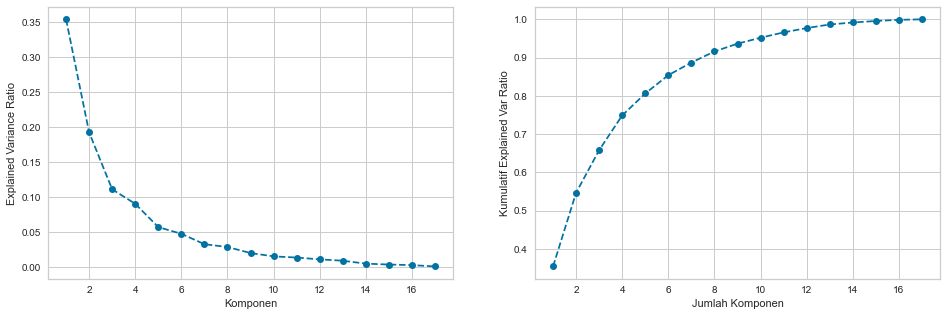

In [27]:
pca = PCA()
pca.fit(train_scaled)

fig,ax=plt.subplots(ncols=2,figsize=(16,5)) 
ax[0].plot(range(1,18),pca.explained_variance_ratio_, "o--") 
ax[0].set_xlabel('Komponen') 
ax[0].set_ylabel('Explained Variance Ratio')  
ax[1].plot(range(1,18),np.cumsum(pca.explained_variance_ratio_), "o--") 
ax[1].set_xlabel('Jumlah Komponen') 
ax[1].set_ylabel('Kumulatif Explained Var Ratio') 
plt.show()

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35417931, 0.54684356, 0.65821496, 0.74889531, 0.80627315,
       0.85412804, 0.88711862, 0.91608271, 0.93644571, 0.95200566,
       0.96592363, 0.97721401, 0.98659082, 0.99178556, 0.99570848,
       0.99879944, 1.        ])

Dari grafik diatas, terlihat bahwa semakin banyak kita mereduksi dimensi dari feature maka informasi yang dapat dipertahankan semakin kecil (semakin banyak informasi yang hilang). Untuk itu, dalam melakukan dimension reduction dapat ditentukan melalui metode elbow atau menentukan letak patahan dimana setelah patahan perubahan nilainya akan tidak terlalu banyak.

Dari grafik diatas, jumlah dimensi setelah reduksi yang optimal adalah 5 dengan mempertahankan informasi sebanyak 80,74%.

In [29]:
pca_end = PCA(n_components=5)
train_scaled_pca = pca_end.fit_transform(train_scaled)
train_scaled_pca

array([[-0.61701809, -0.36778891,  0.07440112, -0.28489181,  0.09352347],
       [-0.49341985, -0.2379048 ,  0.06904368, -0.4856905 , -0.13577072],
       [-0.34590124, -0.1038247 ,  0.28174204, -0.55799158, -0.08517678],
       ...,
       [-0.85853478,  0.39677956,  0.19168661,  0.46661359, -0.19569549],
       [ 0.20881647,  0.67114794, -0.049058  ,  0.01411898, -0.2025129 ],
       [ 0.20708059,  0.85616717, -0.44680154,  0.82186301, -0.19992337]])

## VI. Model Definition and Training

Model yang digunakan untuk Clustering adalah Kmeans, Aggolomerative dan Spectral.

### VI.I Kmeans

Untuk model Kmeans, dilakukan dengan 2 teknik berbeda yaitu 
1. K-Means dengan pemilihan kluster menggunakan teknik Elbow terhadap plot Inertia (WCSS)
2. K-Means dengan pemilihan kluster menggunakan teknik Siluet

Menentukan Jumlah Cluster dengan melihat plot inertia

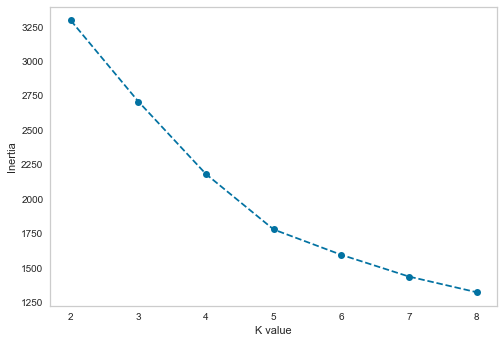

In [30]:
K = [2,3,4,5,6,7,8]
inertia_pca = [KMeans(n_clusters=i, algorithm='elkan', random_state=0).fit(train_scaled_pca).inertia_ for i in K]
plt.plot(K, inertia_pca, 'o--')
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

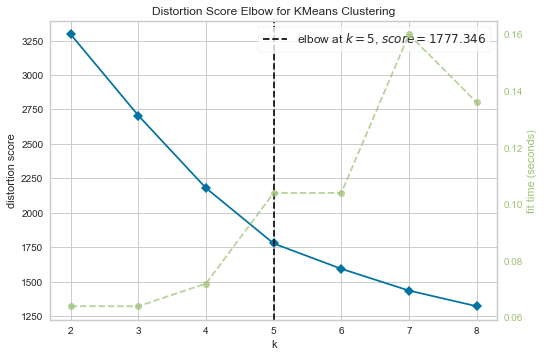

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# defining models
km1_model = KMeans(n_clusters=i, algorithm='elkan', random_state=0)

# Showing elbow point
Elbow_M = KElbowVisualizer(km1_model, k=(2,9))
Elbow_M.fit(train_scaled_pca)
Elbow_M.show()

Menurut teknik elbow, didapat bahwa jumlah kluster terbaik adalah 5.

Selanjutnya akan dilakukan penentuan jumlah kluster menggunakan siluet.

Silhouette Score For KMeans

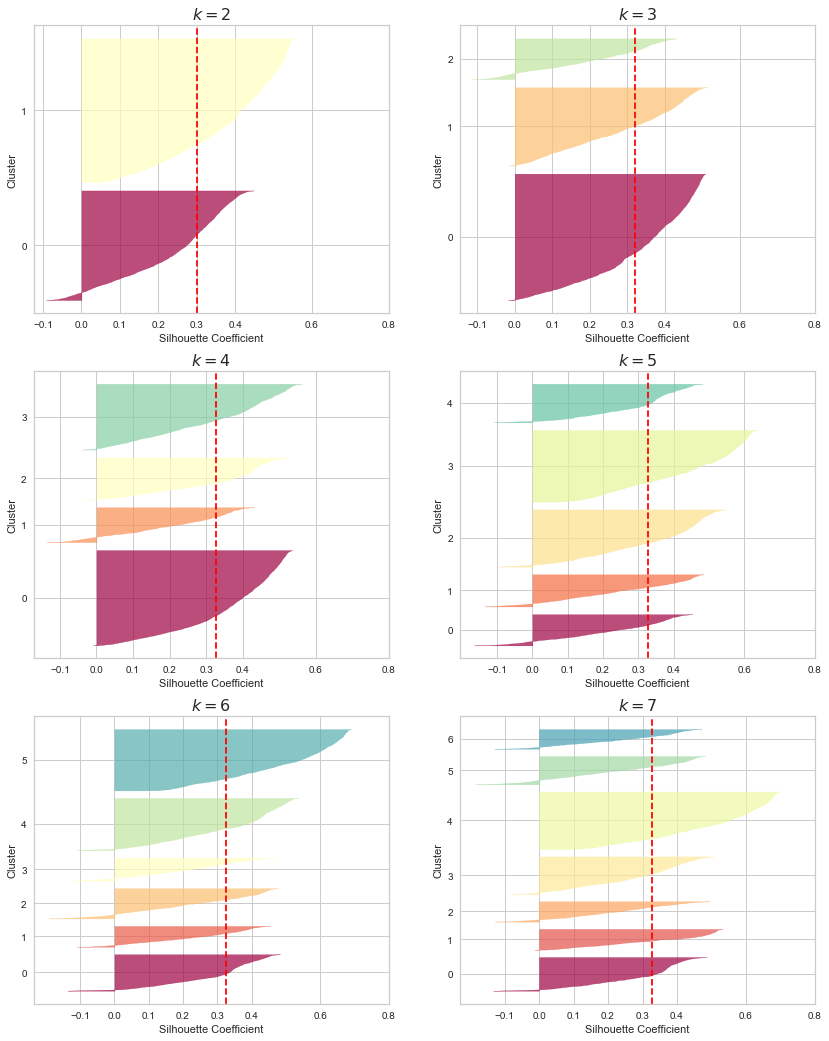

In [32]:
kmeans_models = [KMeans(n_clusters=k, random_state=0, algorithm='elkan').fit(train_scaled_pca) for k in range (1, 10)]
silhouette_scores = [silhouette_score(train_scaled_pca, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(14, 18))

for k in (2, 3, 4, 5, 6, 7):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_models[k-1].labels_
    silhouette_coefficients = silhouette_samples(train_scaled_pca, y_pred)

    padding = len(train_scaled_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 3, 4, 5, 6, 7):
        plt.ylabel("Cluster")
    
    if k in (2, 3, 4, 5, 6, 7):
        plt.gca().set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Berdasarkan hasil siluet diatas, jumlah kluster terbaik adalah 2. Hal ini dipilih karena koefisien negatif pada `2 kluster`  lebih sedikit

Kemudian akan dilakukan pemodelan dengan jumlah kluster 2 dan 5 untuk melihat perbandingan hasil clusteringnya.

#### K-Means : 2 kluster

In [33]:
kmn1 =  KMeans(n_clusters=2, algorithm='elkan', random_state=0)
hasil_kmn1 = data_train.copy()
hasil_kmn1['KMeans Cluster'] = kmn1.fit_predict(train_scaled_pca)
hasil_kmn1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10,1
4262,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,1
4263,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1
4264,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,0


Memplot hasil K-Means dengan 2 kluster

<AxesSubplot: title={'center': 'K-Means Clustering Visualization : 2 Clusters'}>

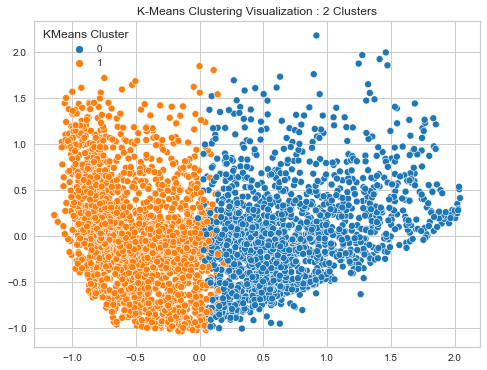

In [34]:
pca_visual_2d = PCA(n_components=2).fit_transform(train_scaled_pca)
plt.figure(figsize=(8,6))
plt.title('K-Means Clustering Visualization : 2 Clusters')
sns.scatterplot(x=pca_visual_2d[:,0], y=pca_visual_2d[:,1], hue=hasil_kmn1['KMeans Cluster'], palette='tab10')

#### K-Means : 5 kluster

In [35]:
kmn2 =  KMeans(n_clusters=5, algorithm='elkan', random_state=0)
hasil_kmn2 = data_train.copy()
hasil_kmn2['KMeans Cluster'] = kmn2.fit_predict(train_scaled_pca)
hasil_kmn2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,3
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,3
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,3
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,3
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10,3
4262,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,3
4263,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1
4264,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1


Memplot hasil K-Means 5 kluster

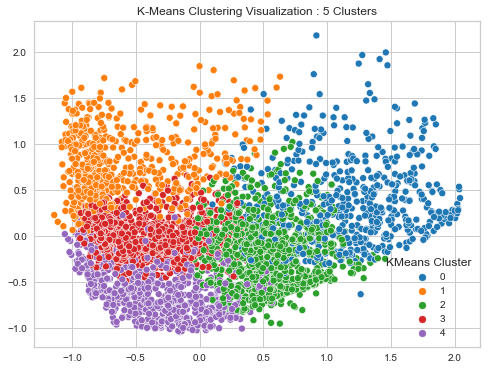

In [36]:
plt.figure(figsize=(8,6))
plt.title('K-Means Clustering Visualization : 5 Clusters')
sns.scatterplot(x=pca_visual_2d[:,0], y=pca_visual_2d[:,1], hue=hasil_kmn2['KMeans Cluster'], palette='tab10')
plt.show()

Dari hasil gambal cluster, model K-Means dengan 2 cluster terlihat lebih jelas batas antar klusternya dibandingkan dengan model K-Means 5 kluster.

### VI.II Agglomerative Clustering

Pada model Agglomerative akan dilakukan dengan 2 kluster sehingga dapat dibedakan hasilnya dengan model K-Means

In [37]:
agg_cls = AgglomerativeClustering(n_clusters=2, linkage='ward')
hasil_agg = data_train.copy()
hasil_agg['Agg Cluster'] = agg_cls.fit_predict(train_scaled_pca)
hasil_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agg Cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,0
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,0
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,0
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,0
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10,0
4262,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,0
4263,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,0
4264,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,0


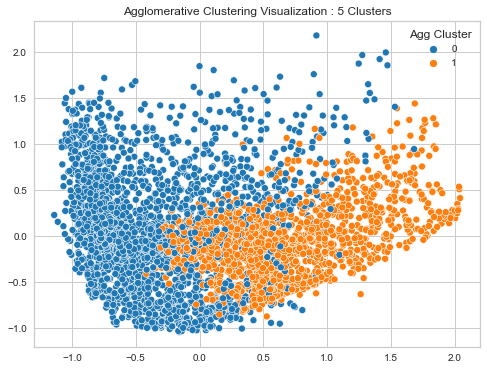

In [38]:
plt.figure(figsize=(8,6))
plt.title('Agglomerative Clustering Visualization : 5 Clusters')
sns.scatterplot(x=pca_visual_2d[:,0], y=pca_visual_2d[:,1], hue=hasil_agg['Agg Cluster'], palette='tab10')
plt.show()

Hasil plotting dengan Agglomerative menunjukkan adanya kluster yang terbedakan. Namun jika dibandingkan dengan hasil K-Means, pembatas pada Agglomerative kurang terlihat jelas dan terlihat lebih banyak data yang salah pengelompokan.

### VI.III Spectral Clustering

Pada model Spectral akan dilakukan dengan 2 kluster sehingga dapat dibedakan hasilnya dengan model K-Means dan Agglomerative

In [39]:
spec_cls = SpectralClustering(n_clusters=2, random_state=0)
hasil_spec = data_train.copy()
hasil_spec['Spectral Cluster'] = spec_cls.fit_predict(train_scaled_pca)
hasil_spec

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Spectral Cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,0
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,0
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,0
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,0
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10,0
4262,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,0
4263,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,0
4264,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,0


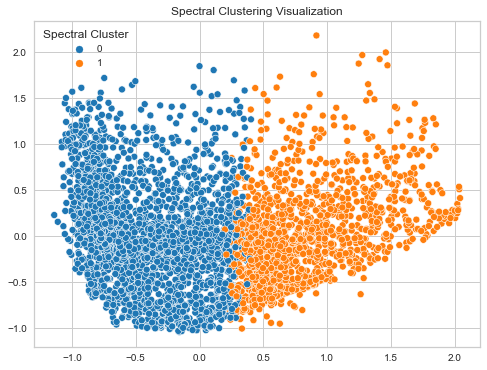

In [40]:
plt.figure(figsize=(8,6))
plt.title('Spectral Clustering Visualization')
sns.scatterplot(x=pca_visual_2d[:,0], y=pca_visual_2d[:,1], hue=hasil_spec['Spectral Cluster'], palette='tab10')
plt.show()

Hasil plotting dengan Spectral menunjukkan adanya kluster yang terbedakan. Batasan cluster yang terbentuk terlihat jelas yang dimana hampir mirip seperti pada K-Means. Namun terlihat bahwa garis batas sedikit bergeser ke kanan dan cluster 0 berada di sebalah kiri.

## VII. Model Evaluasi

### VII.I Perbandingan Score Model

In [41]:
result_comp = pd.DataFrame({'Model' : ["KMeans(n_clusters=2, algorithm='elkan', random_state=0)", "KMeans(n_clusters=5, algorithm='elkan', random_state=0)", "AgglomerativeClustering(n_clusters=2, linkage='ward')", "SpectralClustering(n_clusters=2, random_state=0)"],
                  'Silhouete Score' : [silhouette_score(train_scaled_pca, kmn1.labels_), silhouette_score(train_scaled_pca, kmn2.labels_), silhouette_score(train_scaled_pca, agg_cls.labels_), silhouette_score(train_scaled_pca, spec_cls.labels_)],
                  'Calinski Score' : [calinski_harabasz_score(train_scaled_pca, kmn1.labels_), calinski_harabasz_score(train_scaled_pca, kmn2.labels_), calinski_harabasz_score(train_scaled_pca, agg_cls.labels_), calinski_harabasz_score(train_scaled_pca, spec_cls.labels_)]})
result_comp

,Model,Silhouete Score,Calinski Score
0,"KMeans(n_clusters=2, algorithm='elkan', random...",0.320068,2073.564111
1,"KMeans(n_clusters=5, algorithm='elkan', random...",0.328233,1870.059823
2,"AgglomerativeClustering(n_clusters=2, linkage=...",0.253612,1399.265460
3,"SpectralClustering(n_clusters=2, random_state=0)",0.320590,1947.220328


Dari hasil di atas, terlihat bahwa model terbaik adalah K-Means dengan 2 kluster dengan Siluet score 0.32 dan Calinski Score 2073.57.

Hasil ini juga terlihat jelas pada visualisasi cluster dimana Visualisasi K-Means dengan 2 kluster menghasilkan batas kluster yang lebih jelas dan hanya sedikit data yang tumpang tindih (salah clustering)

### VII.II EDA Based on K-Means Clustering

Terlihat bahwa K-Means dengan 2 kluster merupakan metode yang terbaik. Karena itu, akan dilakukan EDA berdasarkan hasil klusternya.

[Text(0, 0, '1847'), Text(0, 0, '2419')]

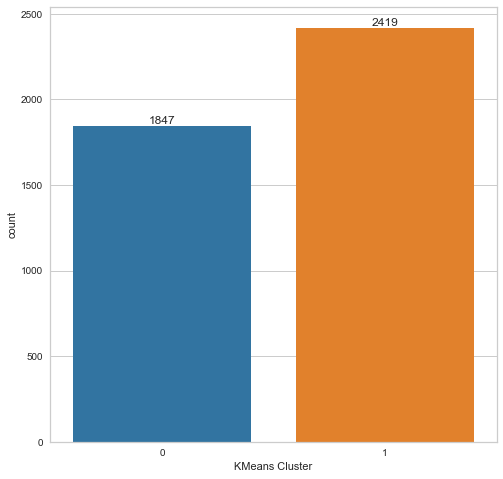

In [42]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=hasil_kmn1, x='KMeans Cluster', palette='tab10')
ax.bar_label(ax.containers[0], label_type='edge')

persentase kluster 0

In [43]:
1847/(1847+2419)*100

43.295827473042664

persentase kluster 1

In [44]:
2419/(1847+2419)*100

56.70417252695734

Dari hasil diatas, terlihat bahwa jumlah pada kluster 1 lebih banyak dari kluster 0. 
- Kluster 0 : 1847 orang (43,3%)
- Kluster 1 : 2419 orang (56,7%)

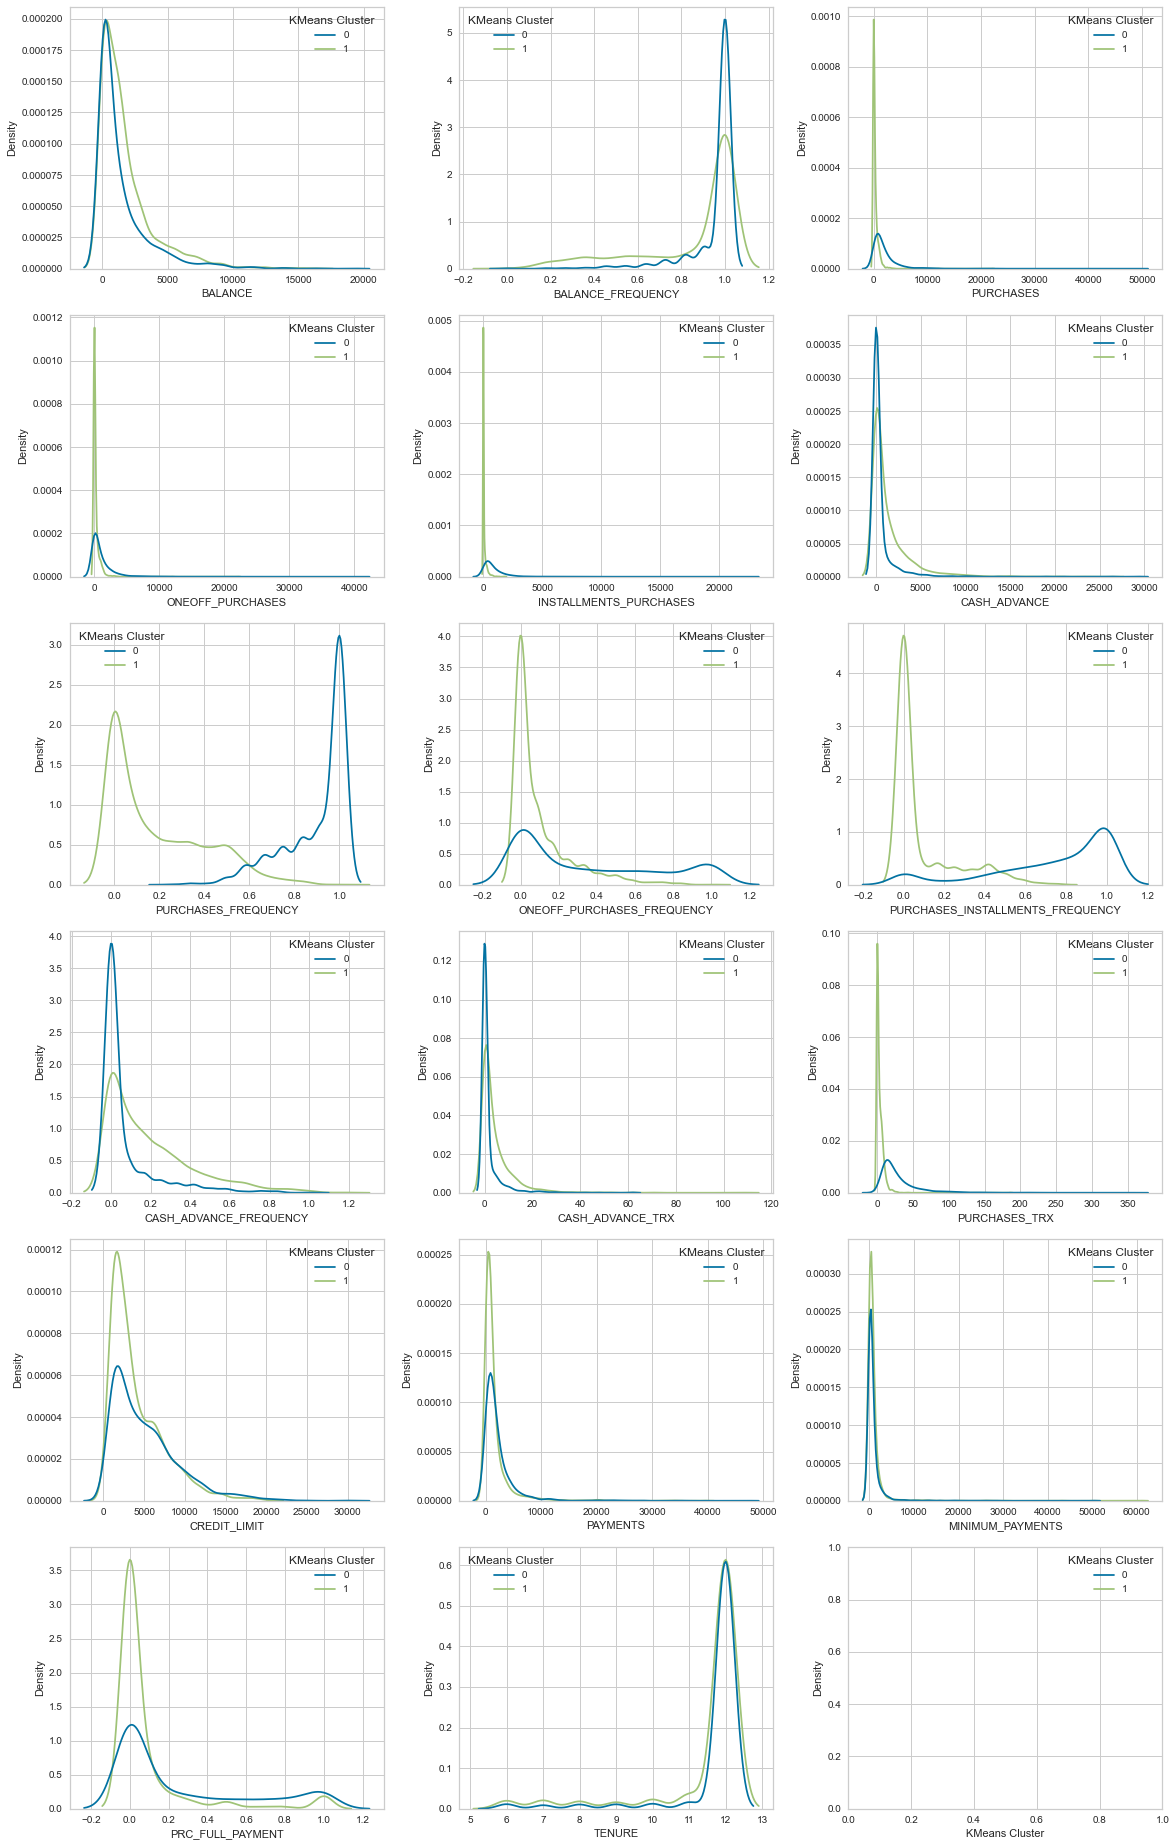

In [45]:
cols = 3
rows = 6
num_cols = hasil_kmn1.columns
fig = plt.figure( figsize=(cols*5.5, rows*4.3))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x = hasil_kmn1[col], hue=hasil_kmn1['KMeans Cluster'], ax = ax)

fig.tight_layout()
plt.show()

Dari hasil diatas, kluster ini sangat terbedakan berdasarkan nilai pada feature `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` dimana 
1. orang-orang yang memiliki nilai `PURCHASES_FREQUENCY` kurang dari 0.6 maka akan masuk pada kluster 1 dan orang-orang yang memiliki nilai `PURCHASES_FREQUENCY` lebih dari 0.6 akan berpotensi masuk pada kluster 0.
2. orang-orang yang memiliki nilai `PURCHASES_INSTALLMENTS_FREQUENCY` kurang dari 0.5 maka akan masuk pada kluster 1 dan orang-orang yang memiliki nilai `PURCHASES_FREQUENCY` lebih dari 0.5 akan berpotensi masuk pada kluster 0.

Statistik Descriptif dari Kluster 0

In [46]:
hasil_kmn1[(hasil_kmn1['KMeans Cluster'] == 0)].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1847.0,1426.794110,2088.329471,0.000000,116.821753,559.917793,1840.241181,19043.13856
BALANCE_FREQUENCY,1847.0,0.955026,0.117961,0.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,1847.0,1991.884185,3070.660605,8.400000,537.020000,1176.000000,2335.255000,49039.57000
ONEOFF_PURCHASES,1847.0,1093.013887,2367.812613,0.000000,0.000000,326.200000,1313.955000,40761.25000
INSTALLMENTS_PURCHASES,1847.0,899.353936,1277.321832,0.000000,262.160000,555.840000,1107.710000,22500.00000
CASH_ADVANCE,1847.0,479.100796,1690.085260,0.000000,0.000000,0.000000,62.793769,29282.10915
PURCHASES_FREQUENCY,1847.0,0.900836,0.141589,0.250000,0.833333,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,1847.0,0.351334,0.371717,0.000000,0.000000,0.181818,0.666667,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1847.0,0.738867,0.303229,0.000000,0.583333,0.833333,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,1847.0,0.066697,0.148015,0.000000,0.000000,0.000000,0.083333,1.00000


> Kluster 0

Berdasarkan statistika deskriptif dari kluster 0 maka dapat kita simpulkan untuk karakteristik yang terdapat pada kluster 0, yaitu:

1. Credit Limit kartu kredit mencapai 30.000 USD
2. Balance pada kartu kredit mencapai 19.000 USD
3. Balance Frequency rata-ratanya 0,95
4. Nilai Purchase(Pembelian) yang tinggi dengan rata-rata 1.991 USD dan sering melakukan Purchase(Pembelian)
5. Nilai pembelian satu kali(Oneoff Purchases) tinggi dengan rata-rata 1.093 USD dan dan jarang melakukannya
6. Cukup sering melakukan cicilan dengan nilai yang cukup besar dengan lama cicilan (Tenure) 12 bulan

Statistik Descriptif dari Kluster 1

In [47]:
hasil_kmn1[(hasil_kmn1['KMeans Cluster'] == 1)].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2419.0,1739.890602,2117.102028,0.000000,231.702722,1101.854700,2321.952628,16304.889250
BALANCE_FREQUENCY,2419.0,0.849880,0.244878,0.000000,0.727273,1.000000,1.000000,1.000000
PURCHASES,2419.0,288.498975,677.510395,0.000000,0.000000,79.000000,359.120000,22101.780000
ONEOFF_PURCHASES,2419.0,223.888971,665.776469,0.000000,0.000000,0.000000,229.970000,22101.780000
INSTALLMENTS_PURCHASES,2419.0,64.928165,163.819476,0.000000,0.000000,0.000000,52.590000,1859.340000
CASH_ADVANCE,2419.0,1377.554711,2393.017190,0.000000,0.000000,365.489055,1790.635294,26194.049540
PURCHASES_FREQUENCY,2419.0,0.185694,0.211403,0.000000,0.000000,0.083333,0.333333,1.000000
ONEOFF_PURCHASES_FREQUENCY,2419.0,0.094571,0.154837,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,2419.0,0.087951,0.161513,0.000000,0.000000,0.000000,0.087121,0.750000
CASH_ADVANCE_FREQUENCY,2419.0,0.189351,0.218440,0.000000,0.000000,0.100000,0.285714,1.166667


> Kluster 1

Berdasarkan statistika deskriptif dari kluster 1 maka dapat kita simpulkan untuk karakteristik yang terdapat pada kluster 1, yaitu:

1. Credit Limit kartu kredit mencapai 20.000 USD
2. Balance pada kartu kredit mencapai 16.300 USD
3. Balance Frequency rata-ratanya 0,84
4. Nilai Purchase(Pembelian) yang rendah dengan rata-rata 288 USD dan jarang melakukan pembelian(Purchase)
5. Nilai pembelian satu kali(Oneoff Purchases) yang rendah dengan rata-rata 224 USD dan jarang melakukannya
6. Sangat jarang melakukan cicilan dan nilai cicilannya rendah. Lama cicilan (Tenure) yang dilakukan 12 bulan

## VIII. Model Inference

Menampilkan data inference

In [48]:
data_inf.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2105.898309,1.000000,0.00,0.00,0.00,217.314696,0.000000,0.000000,0.000000,0.333333,5,0,2250.0,569.815997,1031.776402,0.000000,12
1,20.595501,0.545455,289.78,0.00,289.78,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2700.0,342.440014,82.359493,0.363636,12
2,4320.267209,1.000000,117.23,117.23,0.00,2746.430467,0.083333,0.083333,0.000000,0.333333,6,1,8000.0,1200.321938,1017.299239,0.000000,12
3,5248.392421,1.000000,8403.17,7469.70,933.47,3141.100688,0.833333,0.666667,0.750000,0.500000,12,117,13000.0,8495.972927,1183.069705,0.250000,12
4,1.344661,0.181818,785.90,0.00,785.90,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,3000.0,789.264325,0.319475,0.000000,12


Melakukan feature scaling dan PCA

In [49]:
x_inf = scaler.transform(data_inf[num_col])
pca_inf = pca_end.transform(x_inf)

Melakukan clustering

In [50]:
pred_inf = kmn1.predict(pca_inf)

Menampilkan hasil clustering

In [51]:
data_inf['cluster'] = pred_inf
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,2105.898309,1.000000,0.00,0.00,0.00,217.314696,0.000000,0.000000,0.000000,0.333333,5,0,2250.0,569.815997,1031.776402,0.000000,12,1
1,20.595501,0.545455,289.78,0.00,289.78,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2700.0,342.440014,82.359493,0.363636,12,1
2,4320.267209,1.000000,117.23,117.23,0.00,2746.430467,0.083333,0.083333,0.000000,0.333333,6,1,8000.0,1200.321938,1017.299239,0.000000,12,1
3,5248.392421,1.000000,8403.17,7469.70,933.47,3141.100688,0.833333,0.666667,0.750000,0.500000,12,117,13000.0,8495.972927,1183.069705,0.250000,12,0
4,1.344661,0.181818,785.90,0.00,785.90,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,3000.0,789.264325,0.319475,0.000000,12,0
5,260.838885,1.000000,2854.11,1797.96,1056.15,0.000000,1.000000,0.833333,0.916667,0.000000,0,51,9500.0,2437.332725,176.283228,1.000000,12,0
6,2138.185971,1.000000,45.65,45.65,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,728.892219,755.461023,0.000000,12,1
7,1058.369265,1.000000,0.00,0.00,0.00,1353.576787,0.000000,0.000000,0.000000,0.250000,4,0,1500.0,1381.061656,266.359712,0.000000,12,1
8,449.556041,0.454545,143.00,143.00,0.00,1135.028534,0.083333,0.083333,0.000000,0.250000,4,2,5000.0,4723.998143,351.230553,0.000000,12,1
9,1628.591333,1.000000,361.00,0.00,361.00,291.278909,0.833333,0.000000,0.750000,0.166667,2,20,1800.0,1018.197785,684.453198,0.000000,12,0


Visualisasi hasil cluster

In [52]:
pca_visual_2d_inf = PCA(n_components=2).fit_transform(x_inf)

Text(0.5, 1.0, 'Clustering Visualization Data Inference')

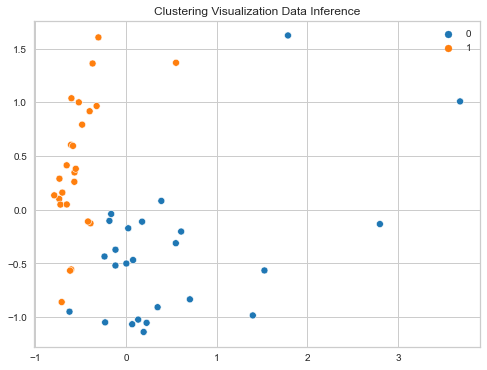

In [53]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pca_visual_2d_inf[:,0], y=pca_visual_2d_inf[:,1], hue=pred_inf, palette='tab10')
ax.set_title('Clustering Visualization Data Inference')

## IX. Kesimpulan

Berdasarkan analisis dan clustering yang dilakukan, dapat disimpulakan:

1. Metode Clustering `K-Means` baik digunakan untuk mengelompokkan pengguna kartu kredit berdasarkan riwayat penggunaan kartu kredit
2. Berdasarkan hasil clustering, teknik pemilihan cluster menggunakan `siluet` lebih baik dibandingkan dengan teknik pemilihan `Elbow`
3. Pengguna kartu kredit dikelempokkan menjadi 2 yaitu kluster 0 dan kluster 1
4. `Kluster 0` merupakan pengguna kartu kredit yang sering melakukan transaksi dan nilai transaksinya besar sedangkan `Kluster 1` merupakan pengguna kartu kredit yang jarang melakukan transaksi dan nilai transaksinya kecil
5. Pengguna pada Kluster 0 perlu dilakukan penanganan khusus agar meraka tetap menggunakan kartu kredit dan menaikkan transaksinya
6. Pengguna pada Kluster 1 merupakan tempat yang cocok untuk dilakukan promosi barang-barang karena mereka lebih sering melakukan transaksi

## X. Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia adalah nilai WCSS(Within-Cluster Sum of Square) atau jumlah kuadrat jarak dari setiap sampel ke pusat cluster terdekat. Dengan bertambahnya jumlah cluster, nilai WCSS akan mulai berkurang. Untuk menentukan jumlah cluster yang optimal dapat dilakukan dengan metode Elbow.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method merupakan heuristik yang digunakan untuk menghitung jumlah cluster dalam suatu dataset. Elbow method digunakan agar model clustering berjalan dengan optimal. Pemilihan jumlah kluster dilakukan pada titik cut-off(elbow) dimana penurunan nilai explained variance sudah tidak lagi sebanding dengan penambahan. Kelemahan dari metode ini adalah pemilihan titik cut-off(elbow) dilakukan melalui intuisi sehingga kita harus sering melakukan clustering agar intuisi kita menjadi semakin bagus dalam pemilihan jumlah cluster, terkadang tidak ada siku yang tajam dan terdapat nilai yang ambigu. 

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Perbedaan K-Means dengan Agglomerative:

- K-Means mengharuskan kita untuk terlebih dahulu memasukkan jumlah cluster (K) dan akan menempatkan centroid awal yang dipilih secara acak tetapi Agglomerative tidak memiliki persyaratan seperti itu. Hasil dari metode agglomeratif dapat ditampilkan dalam bentuk diagram yang disebut dendogram
- Hasil K-Means pada data spherical lebih baik daripada Agglomerative
- Metode agglomeratif mulai dengan menganggap ada n klaster, kemudian pada setiap langkah dua klaster bergabung hingga akhirnya ada satu klaster dan kemudian dipilih jumlah cluster yang terbaik. Sedangkan K-Means memiliki jumlah kluster yang sama pada setiap iterasinya.
- K-Means membutuhkan data sirkular, sedangkan agglomeratif dapat digunakan pada data yang tidak sirkular.
- K-Means menggunakan median atau rata-rata untuk menghitung centroid untuk merepresentasikan cluster sementara HCA memiliki berbagai metode keterkaitan yang mungkin atau mungkin tidak menggunakan centroid.

Perbadaan K-Means dengan Spectral:
- Spectral Clustering adalah teknik yang berakar pada teori graf, dimana pendekatan ini digunakan untuk mengidentifikasi komunitas node dalam graf berdasarkan sisi-sisi yang menghubungkannya.
- teknik pengelompokan spektral memanfaatkan spektrum (nilai eigen) dari matriks kesamaan data untuk melakukan pengurangan dimensi sebelum pengelompokan dalam dimensi yang lebih sedikit.
- Algoritma Spectral menggunakan perhitungan laplacian matrix sistem partisi massa-pegas, di mana setiap massa dikaitkan dengan titik data dan setiap kekakuan pegas korespondensi dengan bobot tepi yang menggambarkan kesamaan dari dua titik data terkait.
